In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
def mean_salary(salary):
    if len(salary) > 0:
        mean_salary_1 = salary.sum() / len(salary)
        mean_salary_2 = salary.mean()
        print(f'Среднее арифметическое равно {mean_salary_1} (проверка {mean_salary_2})')

def std_salary(salary):
    if len(salary) > 0:
        std_salary_1 = np.sqrt(((salary - salary.mean()) ** 2).sum() / len(salary))
        std_salary_2 = salary.std(ddof=0)
        print(f'Среднее квадратичное отклонение {std_salary_1} (проверка {std_salary_2})')

def variance_salary1(salary):
    if len(salary) > 0:
        variance_salary_1 = ((salary - salary.mean()) ** 2).sum() / len(salary)
        variance_salary_2 = salary.var(ddof=0)
        print(f'Cмещенная оценка дисперсии  {variance_salary_1} (проверка {variance_salary_2})')

def variance_salary2(salary):
    if len(salary) > 0:
        variance_salary2_1 = ((salary - salary.mean()) ** 2).sum() / (len(salary) - 1)
        variance_salary2_2 = salary.var(ddof=1)
        print(f'Несмещенная оценка дисперсии  {variance_salary2_1} (проверка {variance_salary2_2})')   

In [3]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
mean_salary(salary)
std_salary(salary)
variance_salary1(salary)
variance_salary2(salary)

Среднее арифметическое равно 65.3 (проверка 65.3)
Среднее квадратичное отклонение 30.823854398825596 (проверка 30.823854398825596)
Cмещенная оценка дисперсии  950.11 (проверка 950.11)
Несмещенная оценка дисперсии  1000.1157894736842 (проверка 1000.1157894736842)


In [4]:
df_salary = pd.DataFrame(salary)
q1 = df_salary[0].quantile(0.25)
q3 = df_salary[0].quantile(0.75)
iqr = q3 - q1

print(f'Первый квартиль: {q1}')
print(f'Трейтий квартиль: {q3}')
print(f'Интерквартильное расстояние: {iqr}')

Первый квартиль: 42.0
Трейтий квартиль: 81.0
Интерквартильное расстояние: 39.0


<AxesSubplot: >

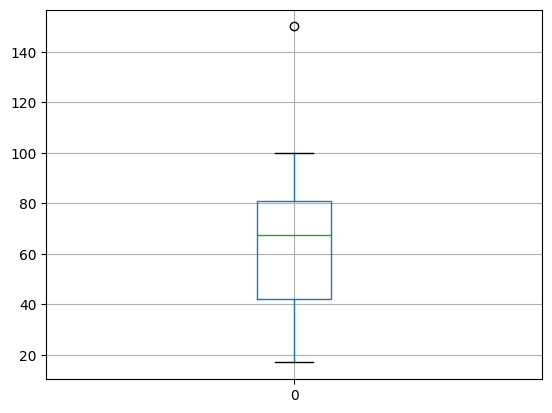

In [5]:
df_salary.boxplot()

In [6]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [7]:
outliers = df_salary.loc[(df_salary[0] < boxplot_range[0]) | (df_salary[0] > boxplot_range[1])]
print(f'Выбросы: {outliers[0].value_counts()}')

Выбросы: 150    1
Name: 0, dtype: int64
